In [2]:
import numpy as np
import matplotlib.pyplot as plt

import dust
import sigma_scat as ss

%matplotlib inline

In [3]:
AMIN, AMAX = 0.005, 0.25 # microns
NA  = 50  # number of points to use to sample distribution
RHO = 3.8 # grain density (g cm^-3)
P   = 3.5 # power law slope
mrn = dust.Dustdist( rad=np.linspace(AMIN,AMAX,NA), rho=RHO, p=P )

ENERGY = np.logspace(-1,1,50)
MDUST  = 1.e22 * dust.c.mp() * 0.009  # magic numbers (dust mass per 10^22 H)

## Try out the new Kappascat

In [14]:
kappascat = ss.Kappascat(E=ENERGY, dist=dust.Dustspectrum(rad=mrn), 
                         scatm=ss.makeScatmodel('Mie','Silicate'))

In [15]:
import cProfile
import pstats

In [16]:
profile_name = 'Kappascat.prof'

In [17]:
cProfile.run("kappascat()",filename=profile_name)

In [18]:
stats = pstats.Stats(profile_name)
stats.strip_dirs()
stats.sort_stats('cumtime').print_stats(20)

Tue Sep 29 17:04:14 2015    Kappascat.prof

         2292459 function calls in 50.635 seconds

   Ordered by: cumulative time
   List reduced from 45 to 20 due to restriction <20>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000   50.635   50.635 <string>:1(<module>)
        1    0.001    0.001   50.635   50.635 sigma_scat.py:204(__call__)
       50    0.000    0.000   50.633    1.013 sigma_scat.py:246(_one_scatter)
       50    0.044    0.001   50.633    1.013 scatmodels.py:382(Qsca)
       50   48.735    0.975   50.589    1.012 scatmodels.py:123(getQs)
  1306841    1.389    0.000    1.389    0.000 {numpy.core.multiarray.zeros}
   326685    0.259    0.000    0.259    0.000 {numpy.core.multiarray.where}
   653476    0.194    0.000    0.194    0.000 fromnumeric.py:2514(size)
      100    0.000    0.000    0.009    0.000 polyint.py:62(__call__)
      100    0.001    0.000    0.007    0.000 interpolate.py:492(_evaluate)
      100    0.00

<pstats.Stats instance at 0x1076dc710>

** Now that kappascat has run, plot it **

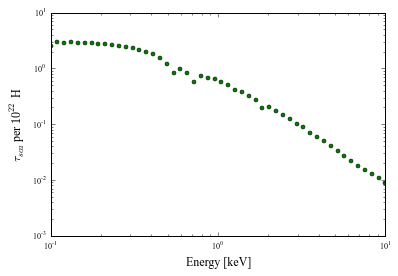

In [19]:
plt.plot( kappascat.E, kappascat.kappa * MDUST, 'go' )
plt.loglog()
plt.xlabel('Energy [keV]')
plt.ylabel(r'$\tau_{sca}$ per $10^{22}$ H')

## Do the same, for Kappaext

In [21]:
kappaext = ss.Kappaext(E=ENERGY, dist=dust.Dustspectrum(rad=mrn), 
                         scatm=ss.makeScatmodel('Mie','Silicate'))

In [22]:
cProfile.run("kappaext()",filename="Kappaext.prof")

In [23]:
stats = pstats.Stats("Kappaext.prof")
stats.strip_dirs()
stats.sort_stats('cumtime').print_stats(20)

Tue Sep 29 17:07:53 2015    Kappaext.prof

         2292409 function calls in 59.018 seconds

   Ordered by: cumulative time
   List reduced from 44 to 20 due to restriction <20>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000   59.018   59.018 <string>:1(<module>)
        1    0.001    0.001   59.018   59.018 sigma_scat.py:277(__call__)
       50    0.060    0.001   59.014    1.180 scatmodels.py:385(Qext)
       50   56.768    1.135   58.954    1.179 scatmodels.py:123(getQs)
  1306841    1.639    0.000    1.639    0.000 {numpy.core.multiarray.zeros}
   326685    0.304    0.000    0.304    0.000 {numpy.core.multiarray.where}
   653476    0.229    0.000    0.229    0.000 fromnumeric.py:2514(size)
      100    0.000    0.000    0.010    0.000 polyint.py:62(__call__)
      100    0.001    0.000    0.007    0.000 interpolate.py:492(_evaluate)
      100    0.003    0.000    0.004    0.000 interpolate.py:443(_call_linear)
      100    0.00

<pstats.Stats instance at 0x107988e60>

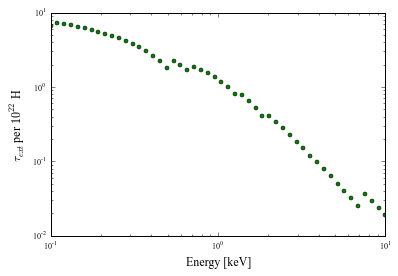

In [24]:
plt.plot( kappaext.E, kappaext.kappa * MDUST, 'go' )
plt.loglog()
plt.xlabel('Energy [keV]')
plt.ylabel(r'$\tau_{ext}$ per $10^{22}$ H')

## Profile getQs

https://github.com/rkern/line_profiler

In [26]:
import kernprof

In [ ]:
kernprof